In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv("train_ctrUa4K.csv")
test_data = pd.read_csv("test_lAUu6dG.csv")
train_data["source"] = "train"
test_data["source"] = "test"

In [5]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,train
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,train
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,train
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,train


In [6]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [8]:
train_data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
source                0
dtype: int64

In [10]:
df = pd.concat([train_data,test_data])

In [11]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'source'],
      dtype='object')

In [13]:
df['Loan_ID'].nunique()

981

In [14]:
df['LoanAmount'].isna().sum()

27

In [15]:
df.index=df['Loan_ID']

In [16]:
np.mean(df['LoanAmount'])

142.51153039832286

In [17]:
df['LoanAmount'].fillna(np.mean(df['LoanAmount']),inplace=True)

In [18]:
df['LoanAmount'].isna().sum()

0

In [19]:
df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']),inplace=True)
df['Credit_History'].fillna(np.mean(df['Credit_History']),inplace=True)
df['Dependents'].fillna(0,inplace=True)

In [20]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.00000,981.000000,981.000000
mean,5179.795107,1601.916330,142.51153,342.201873,0.835920
std,5695.104533,2718.772806,76.34777,64.432886,0.355304
min,0.000000,0.000000,9.00000,6.000000,0.000000
25%,2875.000000,0.000000,101.00000,360.000000,1.000000
50%,3800.000000,1110.000000,128.00000,360.000000,1.000000
75%,5516.000000,2365.000000,160.00000,360.000000,1.000000
max,81000.000000,41667.000000,700.00000,480.000000,1.000000


In [22]:
df["Gender"] = np.where(df["Gender"]=="Male",1,0)
df["Loan_Status"] =  np.where(df["Loan_Status"]=="Y",1,0)
df["Married"] =   np.where(df["Married"]=="Yes",1,0)
df["Education"] = np.where(df["Education"]=="Graduate",1,0)
df["Self_Employed"] =   np.where(df["Self_Employed"]=="Yes",1,0)
df["Property_Area"] = np.where(df["Property_Area"]=="Urban",1,0)



In [23]:
df.select_dtypes(include=np.number)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,1,0,1,0,5849,0.0,142.51153,360.0,1.00000,1,1
LP001003,1,1,1,0,4583,1508.0,128.00000,360.0,1.00000,0,0
LP001005,1,1,1,1,3000,0.0,66.00000,360.0,1.00000,1,1
LP001006,1,1,0,0,2583,2358.0,120.00000,360.0,1.00000,1,1
LP001008,1,0,1,0,6000,0.0,141.00000,360.0,1.00000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,0,1,4009,1777.0,113.00000,360.0,1.00000,1,0
LP002975,1,1,1,0,4158,709.0,115.00000,360.0,1.00000,1,0
LP002980,1,0,1,0,3250,1993.0,126.00000,360.0,0.83592,0,0


In [24]:
df['Loan_Status']

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002971    0
LP002975    0
LP002980    0
LP002986    0
LP002989    0
Name: Loan_Status, Length: 981, dtype: int32

In [25]:
train = df[df["source"]=="train"]
test  = df[df["source"]=="test"]
del train["source"]
del test["source"]

In [26]:
train_n = train.select_dtypes(include = np.number)
test_n = test.select_dtypes(include = np.number)
train_X = train_n.drop(columns = ['Loan_Status'])
train_y = train_n['Loan_Status']
test_X = test_n.drop(columns = ['Loan_Status'])

In [35]:
sample = pd.read_csv("sample_submission_49d68Cx.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
   
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    sample["Loan_Status"] = pred_test
    test_y = pred_test
    sample["Loan_Status"] =  np.where(sample["Loan_Status"]==1,"Y","N")
    sample.to_csv(filename, index = False)

In [36]:
model = LogisticRegression()
model.fit(train_X, train_y)
pred_train = model.predict(train_X)
pred_test = model.predict(test_X)
run_model(model, train_X, train_y, test_X, sample, "test_result_Logist_regression.csv" )

In [37]:
train_X.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [38]:
model = LogisticRegression(Pena)

train_y

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int32

In [39]:
def metric_res(acctual, pred):
    print("confusion_matrix ", confusion_matrix(acctual, pred))
    print("accuracy_score ", accuracy_score(acctual, pred))
    print("recall_score", recall_score(acctual, pred))
    print("precision_score ", precision_score(acctual, pred))
    print("f1_score", f1_score(acctual, pred))
    print("roc_auc_score", roc_auc_score(acctual, pred))
    print("classification report \n", classification_report(acctual, pred))


In [40]:
metric_res(train_y,pred_train)

confusion_matrix  [[ 84 108]
 [  9 413]]
accuracy_score  0.8094462540716613
recall_score 0.9786729857819905
precision_score  0.7927063339731286
f1_score 0.8759278897136797
roc_auc_score 0.7080864928909952
classification report 
               precision    recall  f1-score   support

           0       0.90      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



In [43]:
import sklearn
test_y = pred_test

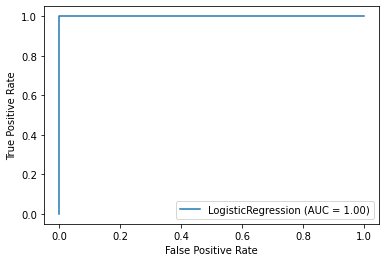

In [45]:
plot_roc_curve(model, test_X, test_y)

ValueError: x and y must be the same size

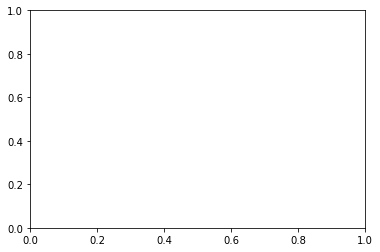

In [47]:
plt.scatter(test_X,test_y)

ValueError: x and y must be the same size

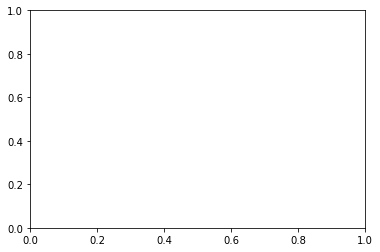

In [48]:
plt.scatter(test_X, model.predict_proba(test_X)[:,1])